In [21]:
%matplotlib inline

import numpy as np
import pandas as pd

from utils import *

In [22]:
df = pd.read_csv('./data/survey-results-public.csv')
df.shape

(51392, 154)

In [23]:
takeaway3 = df[
        list(df.columns[df.columns.to_series().str.contains('Influence')]) +
        list(df.columns[df.columns.to_series().str.contains('EquipmentSatisfied')]) +
        [
            'HomeRemote',
            'EmploymentStatus',
            'FormalEducation',
            'JobSeekingStatus',
            'Professional',
            'CompanySize',
            'CompanyType',
            'WebDeveloperType',
            'MobileDeveloperType',
            'NonDeveloperType',
             # 'CareerSatisfaction',
            'YearsCodedJob',
            'ProblemSolving',
            'BuildingThings',
            'LearningNewTech',
            'BoringDetails',
            'JobSecurity',
            'DiversityImportant',
            'FriendsDevelopers',
            'RightWrongWay',
            'UnderstandComputers',
            'SeriousWork',
            'InvestTimeTools',
            'WorkPayCare',
            'KinshipDevelopers',
            'ChallengeMyself',
            'CompetePeers',
            'ChangeWorld',
            'HoursPerWeek',
            'ImportantBenefits',
            'WorkStart',
            'AuditoryEnvironment',
            'ShipIt',
            'OtherPeoplesCode',
            'ProjectManagement',
            'EnjoyDebugging',
            'InTheZone',
            'DifficultCommunication',
            'CollaborateRemote',
            'Salary',
            'Overpaid',
            'JobSatisfaction'
        ]
    ]
takeaway3

,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,...,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,Salary,Overpaid,JobSatisfaction
0,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,...,Agree,Disagree,Strongly disagree,Agree,Somewhat agree,Disagree,Strongly disagree,NaN,NaN,NaN
2,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some influence,Some influence,Some influence,...,Agree,Disagree,Disagree,Agree,Agree,Disagree,Somewhat agree,113750.0,Neither underpaid nor overpaid,9.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Strongly agree,Disagree,Somewhat agree,NaN,NaN,3.0
4,Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58000.0,Greatly underpaid,3.0
51388,Not very satisfied,A lot of influence,Not much influence,No influence at all,Not much influence,Not much influence,Some influence,A lot of influence,Not much influence,No influence at all,...,NaN,Strongly disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
51390,Very satisfied,I am the final decision maker,No influence at all,No influence at all,A lot of influence,A lot of influence,No influence at all,A lot of influence,A lot of influence,No influence at all,...,Disagree,Agree,Disagree,Agree,Agree,Disagree,Agree,40000.0,Greatly underpaid,7.0


In [24]:
takeaway3 = takeaway3.dropna(subset=['Overpaid'], axis=0)
takeaway3 = takeaway3[takeaway3['EmploymentStatus'].isin(['Employed full-time', 'Employed part-time', 'Independent contractor, freelancer, or self-employed'])]
takeaway3 = takeaway3.drop(['EmploymentStatus',], axis=1)

In [25]:
options = dict(zip(['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important'], [10,7,5,3,0]))
for k,v in options.items():
    takeaway3 = takeaway3.replace(k,v)

In [26]:
X, y = imputing_data(takeaway3, y_column='JobSatisfaction')

initial shape: (13387, 57)
Shape without NAN JobSatisfaction: (13350, 57)
Shape without unnecessary columns: (13350, 56)
Quantitative columns: Index(['HoursPerWeek', 'Salary'], dtype='object')
Shape after imputing quantitative data: (13350, 56)
Categorical columns: Index(['InfluenceInternet', 'InfluenceWorkstation', 'InfluenceHardware',
       'InfluenceServers', 'InfluenceTechStack', 'InfluenceDeptTech',
       'InfluenceVizTools', 'InfluenceDatabase', 'InfluenceCloud',
       'InfluenceConsultants', 'InfluenceRecruitment',
       'InfluenceCommunication', 'EquipmentSatisfiedMonitors',
       'EquipmentSatisfiedCPU', 'EquipmentSatisfiedRAM',
       'EquipmentSatisfiedStorage', 'EquipmentSatisfiedRW', 'HomeRemote',
       'FormalEducation', 'JobSeekingStatus', 'Professional', 'CompanySize',
       'CompanyType', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'YearsCodedJob', 'ProblemSolving', 'BuildingThings',
       'LearningNewTech', 'BoringDetails', 'JobSecuri

In [27]:
y = (y / 3).apply(np.floor)

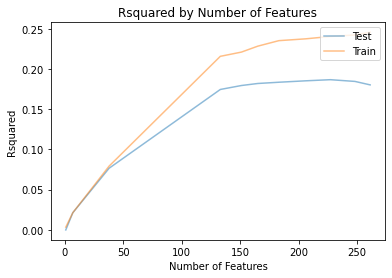

In [28]:
cutoffs = [7000, 5000, 3000, 1000, 800, 600, 400, 200, 100, 50, 40]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [29]:
def coef_weights(coefficients, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coef_df = coef_weights(lm_model.coef_, X_train)

coef_df

,est_int,coefs,abs_coefs
81,JobSeekingStatus_I am not interested in new jo...,0.555481,0.555481
0,HoursPerWeek,-0.440949,0.440949
223,Overpaid_Greatly underpaid,-0.398403,0.398403
206,ProjectManagement_Strongly agree,-0.283769,0.283769
168,KinshipDevelopers_Strongly disagree,-0.282271,0.282271
...,...,...,...
118,YearsCodedJob_4 to 5 years,0.001728,0.001728
141,DiversityImportant_Strongly agree,-0.001580,0.001580
151,UnderstandComputers_Disagree,0.001510,0.001510
70,HomeRemote_About half the time,-0.001086,0.001086
